# Analysis of impact


In [29]:
from trading import Asset
from trading.func_aux import min_max
from datetime import date
import pandas as pd

In [30]:
asset = Asset(
    "AAPL",
    fiat = "MX",
    broker = "gbm",
    start = date(2000,1,1),
    end = date(2023,1,1),
    frequency="1m",
    from_ = "db"
)

asset.df.dropna(inplace = True)

df = asset.df
df.index = pd.to_datetime(df.index)

In [31]:
df["month"] = df.index.map(lambda x: x.month)
df["year"] = df.index.map(lambda x: x.year)

In [32]:
df["pct"] = df["close"].pct_change()

In [39]:
dfp = pd.pivot_table( df, values = "pct", index = "month", columns = "year"  )
# dfp.dropna(axis = 1, inplace = True)

In [40]:
dfp

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,,,,,,
1,0.047605,-0.029619,0.035088,-0.324430,0.105966,-0.095841,0.034934,0.051980,-0.155097,-0.088339,0.064972,-0.033424,0.055588,-0.065174,0.034237,0.064233,0.029642,-0.014014,0.018721
2,1.000000,-0.033282,0.004311,-0.088844,0.033660,0.048000,0.038341,0.171427,-0.026364,0.041371,0.092503,0.000858,0.086685,0.083489,0.050577,-0.101042,-0.049283,-0.063890,NaN
3,-0.363051,-0.073007,0.080616,0.138072,0.086666,0.112595,-0.029973,0.103158,-0.012301,0.009045,-0.007058,0.070445,-0.019487,-0.095611,0.099391,0.138870,-0.031503,0.038414,NaN
4,-0.158414,0.137283,0.077189,0.203571,0.179801,0.118696,-0.021772,-0.012225,-0.035174,0.099442,0.008175,-0.145158,0.003701,0.015659,0.033421,0.174146,0.063251,-0.075992,NaN
5,-0.045379,-0.097840,0.171641,0.062350,0.018864,-0.009966,-0.009449,0.090586,0.077084,0.055407,0.048544,0.138880,0.054903,0.203830,-0.095802,0.007351,-0.061107,-0.090224,NaN
6,0.000000,-0.058028,0.034416,-0.105442,0.050163,0.002943,-0.019950,-0.058916,-0.111138,0.037082,-0.018270,-0.047610,-0.080322,-0.011832,0.100966,0.182057,0.092320,-0.063854,NaN
7,0.231966,0.196172,0.108793,-0.089161,0.163900,0.007412,0.168448,0.041565,0.120098,0.045423,-0.010095,0.116481,0.010115,-0.035616,0.082765,0.125911,0.064029,0.207135,NaN
8,0.068453,-0.085125,0.031578,0.095466,0.034991,-0.014715,0.032230,0.082646,0.126853,0.061279,-0.033284,0.021967,0.108052,0.223912,0.016382,0.204484,0.051025,-0.041201,NaN
9,0.110993,0.150430,0.099579,-0.287851,0.117883,0.116988,0.118143,-0.020191,-0.039641,0.011578,-0.017014,0.098908,-0.044059,-0.032020,0.059538,-0.098801,-0.038921,-0.116660,NaN


In [35]:
dfn = min_max(dfp)

<AxesSubplot:xlabel='month'>

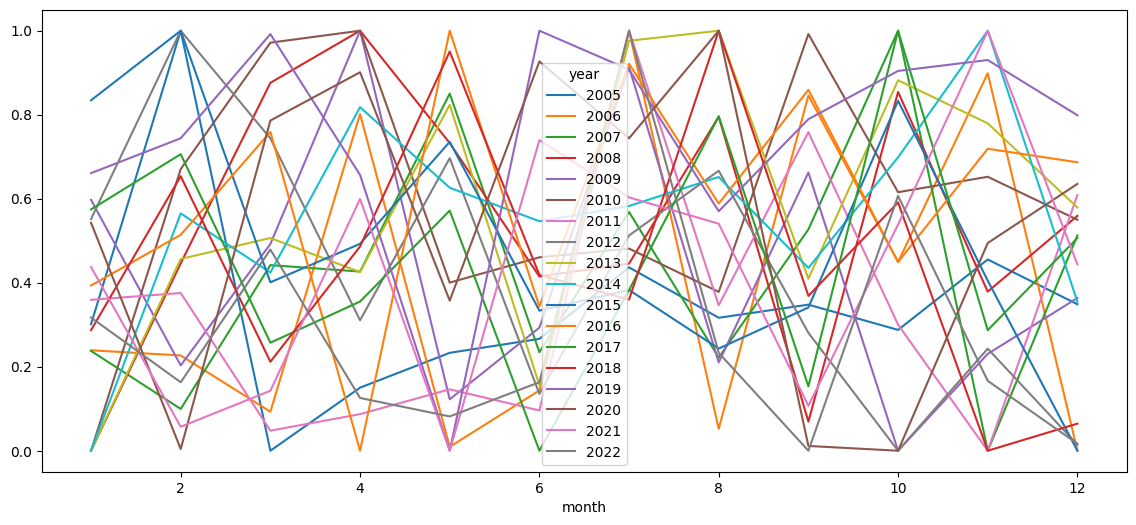

In [38]:
dfn.plot(figsize=(14,6))